In [2]:
import quantstats as qs
import yfinance as yf
import ccxt as ccxt
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.ticker import (
    FormatStrFormatter as _FormatStrFormatter,
    FuncFormatter as _FuncFormatter
)
from datetime import date

#my imports
import sys
sys.path.insert(1, '../scripts')
import utils as utl
import html_evaluation_portfolio as hep
import volatility_estimator as ve

# Comparing portfolios' return computed through different volatility estimator 

In [33]:
list_securities =  ['SPY', 'TLT', 'GLD'] 
window = 30
start_date = pd.to_datetime('2007-01-03') 
end_date = pd.to_datetime(start_date) + pd.DateOffset(days=1814)
title = 'Comparasion of all weather during 2007-2012 period'
save_name = 'SPY_TLT_GLD_estimator_comparasion'

In [34]:
dictionary = {}
data = hep.create_dataframe(list_securities) #I can import this dataframe but it is preatty fast.

for i in list_securities:
    df_strd_dev = ve.dataframe_strd_dev(data, window)
    df_strd_dev = ve.index_df(df_strd_dev, data, window)
    data_perc = hep.perc_df(data)
    inv_volat_data = hep.df_inverse_volatility(data_perc, window)
    df_weighted = hep.df_wheighted(inv_volat_data)
    data_r = data.div(data.shift(1))-1
    data_earnings = hep.df_earnings(df_weighted, data_r)
    data_earnings.dropna(inplace = True)
    
    data_earnings = data_earnings[start_date: end_date]
    
    dictionary['stdv'] = data_earnings[30:]
for i in list_securities:
    data_h_l = ve.create_dataframe_high_low(list_securities)   
    #data_h_l = data_h_l[1135: 1135 + 1834]
    data_h_l = data_h_l.loc[start_date: end_date]
    df_volat = ve.compute_park_volatility(data_h_l, list_securities, window)
    data.dropna(inplace = True)
    #data = data[1135: 1135 + 1834]
    data = data[start_date: end_date]
    df_volat = ve.index_df(df_volat, data, window)
    df_weighted = hep.df_wheighted(df_volat)
    data_r = data.div(data.shift(1))-1
    data_earnings = hep.df_earnings(df_weighted, data_r)
    data_earnings.dropna(inplace = True)
    
    data_earnings = data_earnings[start_date: end_date]
    
    dictionary['park'] = data_earnings

for i in list_securities:
    data_ohlc = ve.create_dataframe_ohlc(list_securities)
    #data_holc = data_holc[1135: 1135 + 1834]
    data_ohlc = data_ohlc[start_date: end_date]
    df_satchell_volat = ve.compute_satchell_volatility(data_ohlc, list_securities, window)
    data.dropna(inplace = True)
    #data = data[1135: 1135 + 1834]
    data = data[start_date: end_date]
    df_satchell_volat = ve.index_df(df_satchell_volat, data, window)
    df_weighted = hep.df_wheighted(df_satchell_volat)
    
    data_r = data.div(data.shift(1))-1
    data_earnings = hep.df_earnings(df_weighted, data_r)
    data_earnings.dropna(inplace = True)
    
    data_earnings = data_earnings[start_date: end_date]
    
    dictionary['satch'] = data_earnings

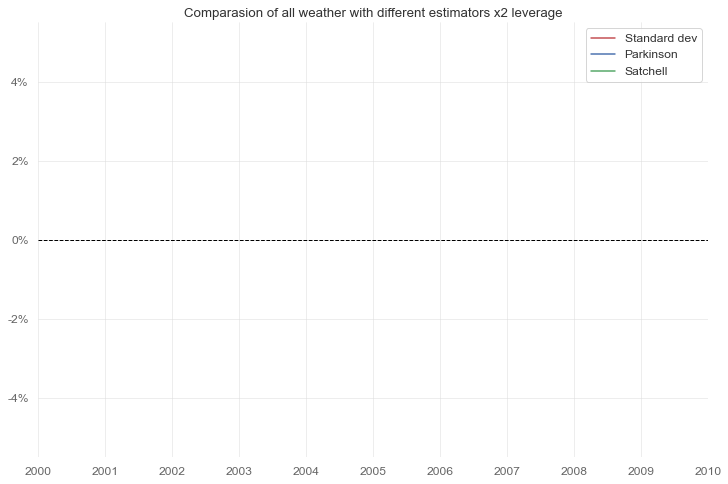

In [83]:
from quantstats.stats import compsum
from quantstats._plotting.core import format_pct_axis

#returns = dict_df['x1 leverage']['Tot']
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title(title)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.plot(compsum(dictionary['stdv']['Tot']), lw=1.5, label='Standard dev', color='r', alpha=1)
ax.plot(compsum(dictionary['park']['Tot']), lw=1.5, label='Parkinson', color='b', alpha=1)
ax.plot(compsum(dictionary['satch']['Tot']), lw=1.5, label='Satchell', color='g', alpha=1)
ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()

plt.savefig('../img/'+ save_name + 'png')

In [36]:
#dictionary

## Comparison All weather 

In [25]:
list_securities = ['SSO', 'UBT', 'UGL', 'DIG', 'UST']  #['SPY', 'TLT', 'GLD'] #['VTI', 'VGLT', 'IAU', 'PDBC'] #['UPRO', 'TMF', 'TYD'] #
window = 30
end_date = date.today()
#start_date = pd.to_datetime(end_date) - pd.DateOffset(days=5834) 
start_date = pd.to_datetime('2020-01-03') 
#end_date = pd.to_datetime(start_date) + pd.DateOffset(days=816)
title = 'Comparasion of all weather with different estimators x2 leverage'
save_name = 'estimator_comparasion_2020-22_x2_leverage'
#start_date

In [28]:
dictionary = {}
data = hep.create_dataframe(list_securities, start_date = start_date, end_date = end_date) #I can import this dataframe but it is preatty fast.

df_strd_dev = ve.dataframe_strd_dev(data, window)
df_strd_dev = ve.index_df(df_strd_dev, data, window)
data_perc = hep.perc_df(data)
inv_volat_data = hep.df_inverse_volatility(data_perc, window)
df_weighted = hep.df_wheighted(inv_volat_data)
data_r = data.div(data.shift(1))-1
data_earnings = hep.df_earnings(df_weighted, data_r)
data_earnings.dropna(inplace = True)

data_earnings = data_earnings[start_date: end_date]
# add to the dictionary the stdv dataframe
dictionary['stdv'] = data_earnings

data_h_l = ve.create_dataframe_high_low(list_securities)   
#data_h_l = data_h_l[1135: 1135 + 1834]
data_h_l = data_h_l.loc[start_date: end_date]
df_volat = ve.compute_park_volatility(data_h_l, list_securities, window)
data.dropna(inplace = True)
#data = data[1135: 1135 + 1834]
data = data[start_date: end_date]
df_volat = ve.index_df(df_volat, data, window)
df_weighted = hep.df_wheighted(df_volat)
data_r = data.div(data.shift(1))-1
data_earnings = hep.df_earnings(df_weighted, data_r)
data_earnings.dropna(inplace = True)

data_earnings = data_earnings[start_date: end_date]
# add to the dictionary the parkinson dataframe
dictionary['park'] = data_earnings



data_ohlc = ve.create_dataframe_ohlc(list_securities)
#data_holc = data_holc[1135: 1135 + 1834]
data_ohlc = data_ohlc[start_date: end_date]
df_satchell_volat = ve.compute_satchell_volatility(data_ohlc, list_securities, window)
data.dropna(inplace = True)
#data = data[1135: 1135 + 1834]
data = data[start_date: end_date]
df_satchell_volat = ve.index_df(df_satchell_volat, data, window)
df_weighted = hep.df_wheighted(df_satchell_volat)

data_r = data.div(data.shift(1))-1
data_earnings = hep.df_earnings(df_weighted, data_r)
data_earnings.dropna(inplace = True)

data_earnings = data_earnings[start_date: end_date]
# add to the dictionary the satchell dataframe
dictionary['satch'] = data_earnings

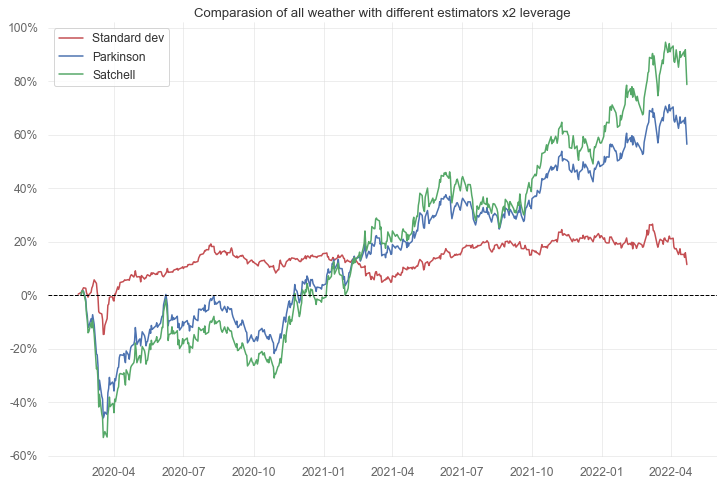

In [29]:
from quantstats.stats import compsum
from quantstats._plotting.core import format_pct_axis

#returns = dict_df['x1 leverage']['Tot']
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title(title)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.plot(compsum(dictionary['stdv']['Tot']), lw=1.5, label='Standard dev', color='r', alpha=1)
ax.plot(compsum(dictionary['park']['Tot']), lw=1.5, label='Parkinson', color='b', alpha=1)
ax.plot(compsum(dictionary['satch']['Tot']), lw=1.5, label='Satchell', color='g', alpha=1)
ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()

plt.savefig('../img/'+ save_name + 'png')

In [30]:
df_vol = pd.DataFrame()
for security in list_securities:
    SEC = yf.Ticker(security)
    hist = SEC.history(start = start_date, end = end_date)
    df_vol[security] = hist['Volume'] #I just consider the close price, is that correct?
#df.sum(axis = 1)
save_name = 'trades_volume_2020-12'
title = 'Volume of trades'

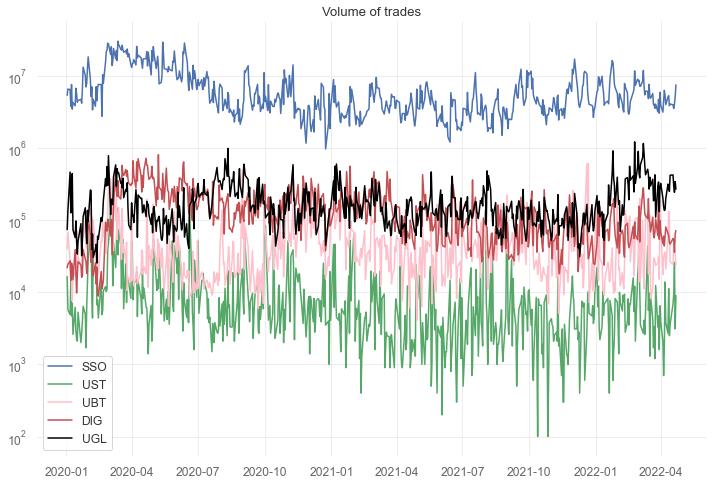

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title(title)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yscale('log')

fig.set_facecolor('white')
ax.set_facecolor('white')
ax.plot(df_vol['SSO'], lw=1.5, label='SSO', color='b', alpha=1)
ax.plot(df_vol['UST'], lw=1.5, label='UST', color='g', alpha=1)
ax.plot(df_vol['UBT'], lw=1.5, label='UBT', color='pink', alpha=1)
ax.plot(df_vol['DIG'], lw=1.5, label='DIG', color='r', alpha=1)
ax.plot(df_vol['UGL'], lw=1.5, label='UGL', color='black', alpha=1)

#ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
#ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()
plt.savefig('../img/'+ save_name + 'png')

In [23]:
def create_dataframe(list_securities, start_date = pd.to_datetime('2007-01-03'), end_date = date.today()):
    df = pd.DataFrame()
    for security in list_securities:
        SEC = yf.Ticker(security)
        if start_date:
            hist = SEC.history(start = start_date, end = end_date)
        else:    
            hist = SEC.history(period="max")
        df[security] = hist['Close'] #I just consider the close price, is that correct?
        #df.dropna() #if this line the data are only from 2010 otyherwise some columns arrive until 2006
    return df

In [26]:
create_dataframe(['SSO', 'UBT'], start_date = pd.to_datetime('2017-01-03'), end_date = pd.to_datetime('2020-01-03'))

,SSO,UBT
Date,,
2017-01-03,18.887821,35.160194
2017-01-04,19.110287,35.441284
2017-01-05,19.076057,36.265499
2017-01-06,19.215408,35.660442
2017-01-09,19.088287,36.198795
...,...,...
2019-12-26,37.756943,48.288990
2019-12-27,37.742027,48.473549
2019-12-30,37.339218,48.074505
